# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Mee Vang

Git Repo: https://github.com/meevang/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

Imports Required:

In [4]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
executing          2.0.1
fonttools          4.51.0
html5lib           1.1
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy              1.26.4
packagi

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [23]:
import requests
import pickle
from bs4 import BeautifulSoup

url = "https://www.coins-global.com/us/case-studies/liberty-electric-implements-mobile-crew-daily-reports/s165991/"

response = requests.get(url)

article_page = requests.get(url)
article_html = article_page.text

with open('Coins_article.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

soup = BeautifulSoup(article_html, 'html.parser')
article_texts = soup.get_text()

with open('Coins_article.txt', 'w', encoding='utf-8') as f:
    f.write(article_texts)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [3]:

from textblob import TextBlob
from spacytextblob.spacytextblob import SpacyTextBlob


with open('Coins_article.pkl', 'rb') as f:
    article_text = pickle.load(f)

article_content = TextBlob(article_text)

polarity_score = article_content.sentiment.polarity

num_sentences = len(article_content.sentences)

print('Polarity Score:', polarity_score)
print('Number of Sentences:', num_sentences)


Polarity Score: -0.018406376243599403
Number of Sentences: 44


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [7]:

import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
import nltk

parser = 'html.parser'
# Load the article text from the pickle file
with open('Coins_article.pkl', 'rb') as f:
    article_text = pickle.load(f)
    
soup = BeautifulSoup(article_text, parser)
article_element = soup.get_text()

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Process the article text using the spaCy pipeline
doc = nlp(article_element)

#remove white space
non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)


# Get the most common tokens (converted to lowercase, excluding stopwords and punctuation)
common_tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

word_freq = Counter(common_tokens)
most_com = word_freq.most_common(5)
# Print the 5 most frequent tokens
print("Most Common Tokens & Frequencies:", word_freq.most_common(5))



Most Common Tokens & Frequencies: [('coins', 24), ('time', 19), ('liberty', 16), ('data', 14), ('construction', 12)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [86]:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
from spacytextblob.spacytextblob import SpacyTextBlob
import nltk
from bs4 import BeautifulSoup

parser = 'html.parser'
# Load the article text from the pickle file
with open('Coins_article.pkl', 'rb') as f:
    article_text = pickle.load(f)
    
soup = BeautifulSoup(article_text, parser)
article_element = soup.get_text()

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Process the article text using the spaCy pipeline
doc = nlp(article_element)

# Remove whitespace tokens
non_ws_tokens = [token for token in doc if not token.is_space]

# Get the most common tokens (converted to lowercase, excluding stopwords and punctuation)
common_lemmas = [token.lemma_.lower() for token in non_ws_tokens if token.is_alpha and token.text not in STOP_WORDS and not token.is_punct]

lemma_freq = Counter(common_lemmas)
most_lemmas = lemma_freq.most_common(5)

# Print the 5 most frequent tokens
print("Most Common Lemmas & Frequencies:", most_lemmas)

Most Common Lemmas & Frequencies: [('coins', 23), ('time', 19), ('liberty', 16), ('cost', 15), ('construction', 12)]


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

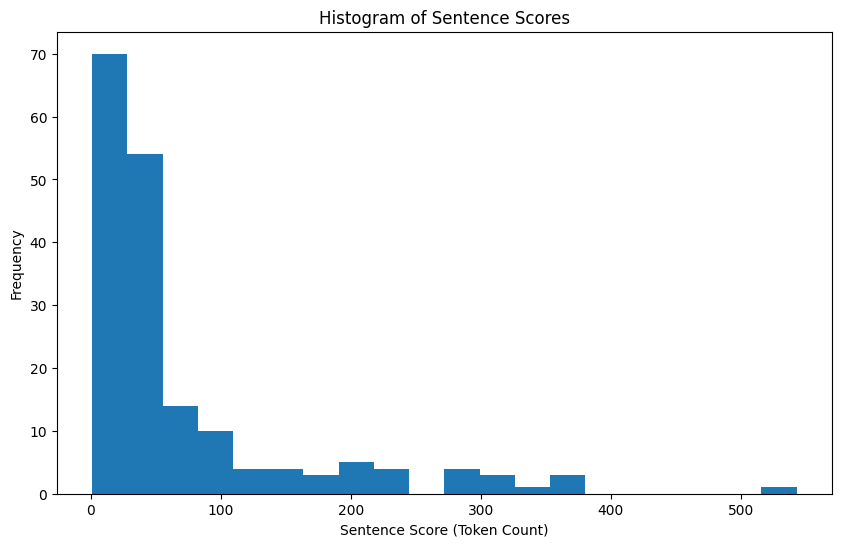

In [87]:
import spacy
import matplotlib.pyplot as plt

# Load the article text from the pickle file
with open('Coins_article.pkl', 'rb') as f:
    article_text = pickle.load(f)

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Process the article text using the spaCy pipeline
doc = nlp(article_text)

# Get the scores (token counts) of each sentence
sentence_scores = [len(sent) for sent in doc.sents]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20)
plt.xlabel("Sentence Score (Token Count)")
plt.ylabel("Frequency")
plt.title("Histogram of Sentence Scores")
plt.show()

Most common range of scores seems to be 10 to 50.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

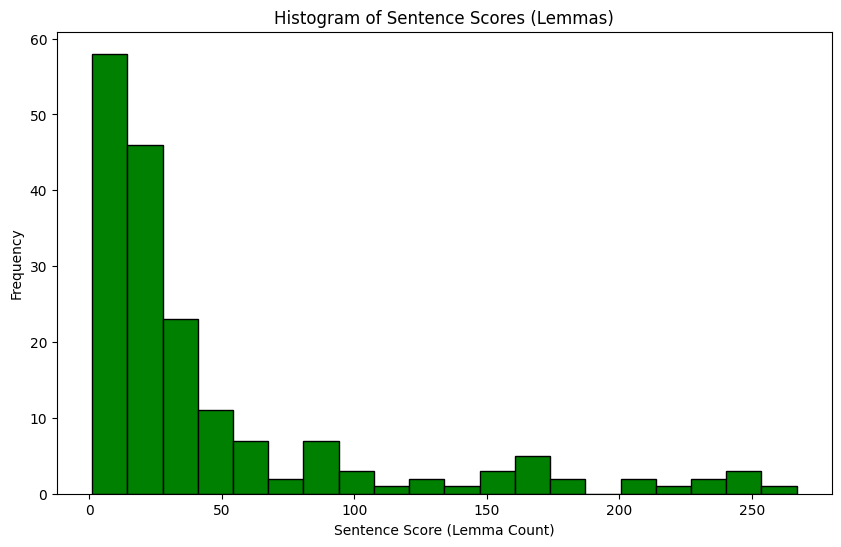

In [89]:
import spacy
import matplotlib.pyplot as plt

# Load the article text from the pickle file
with open('Coins_article.pkl', 'rb') as f:
    article_text = pickle.load(f)

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Process the article text using the spaCy pipeline
doc = nlp(article_text)

# Get the scores (lemma counts) of each sentence
sentence_scores = [len([token.lemma_ for token in sent if not token.is_stop and not token.is_punct]) for sent in doc.sents]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='green', edgecolor='black')
plt.xlabel("Sentence Score (Lemma Count)")
plt.ylabel("Frequency")
plt.title("Histogram of Sentence Scores (Lemmas)")
plt.show()

Most common range of scores seems to be from 10 to 30.

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 15
* Cutoff Score (lemmas): 13

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [28]:
import spacy


# Load the article text from the file
with open('Coins_article.txt', 'r', encoding='utf-8"') as f:
    article_text = f.read()

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Process the article text using the spaCy pipeline
doc = nlp(article_text)

# Cutoff score for tokens
cutoff_score_tokens = 15

# Create a list to store the summary sentences
summary_sentences = []

# Iterate through the sentences and add them to the summary if the score is above the cutoff
for sent in doc.sents:
    if len(sent) > cutoff_score_tokens:
        summary_sentences.append(sent.text.strip())

# Generate the summary text
summary = ' '.join(summary_sentences)

# Print the summary
print(summary)

COINS Case Study | Liberty Electric Implements mobile Crew Daily Reports | Case Studies | COINS Global






















 
 
 




   
































































 




 


COINS Construction CloudCOINS SureStart 




Client Area


+1 518 242 7200









See Software in Action 

UK & IE
USA
Australia
Middle East







 




Home
Company
Solutions
Case Studies
Services
Blog
Contact






   Solutions                  Project Delivery                            Finance and Operations                            Time Management                            Supply Chain Management                            Service Management              By Industry                  General Contracting                            MEP                            Civil Engineering/Heavy Highway                            Residential Development                            Design and BIM                            Specialty Contracting               Spotlight Contact COIN

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [29]:
from textblob import TextBlob

# Assuming the summary is stored in the 'summary' variable
summary_blob = TextBlob(summary)
polarity_score = summary_blob.sentiment.polarity
num_sentences = len(summary.split('.'))

print(f"Polarity score of the summary: {polarity_score}")
print(f"Number of sentences in the summarized article: {num_sentences}")

Polarity score of the summary: 0.14081692359131384
Number of sentences in the summarized article: 56


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [33]:
import spacy

# Load the article text from the file
with open('Coins_article.txt', 'r', encoding='utf-8"') as f:
    article_text = f.read()

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Process the article text using the spaCy pipeline
doc = nlp(article_text)

# Cutoff score for lemmas
cutoff_score_lemmas = 5

# Create a list to store the summary sentences
summary_sentences = []

# Iterate through the sentences and add them to the summary if the score is above the cutoff
for sent in doc.sents:
    if len([token for token in sent if not token.is_stop and not token.is_punct]) > cutoff_score_lemmas:
        summary_sentences.append(sent.text.strip())

# Generate the summary text
summary = ' '.join(summary_sentences)

# Print the summary
print(summary)

COINS Case Study | Liberty Electric Implements mobile Crew Daily Reports | Case Studies | COINS Global






















 
 
 




   
































































 




 


COINS Construction CloudCOINS SureStart 




Client Area


+1 518 242 7200









See Software in Action 

UK & IE
USA
Australia
Middle East







 




Home
Company
Solutions
Case Studies
Services
Blog
Contact






   Solutions                  Project Delivery                            Finance and Operations                            Time Management                            Supply Chain Management                            Service Management              By Industry                  General Contracting                            MEP                            Civil Engineering/Heavy Highway                            Residential Development                            Design and BIM                            Specialty Contracting               Spotlight Contact COIN

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [34]:
from textblob import TextBlob

# Assuming the summary is stored in the 'summary' variable
summary_blob = TextBlob(summary)
polarity_score = summary_blob.sentiment.polarity
num_sentences = len(summary.split('.'))

print(f"Polarity score of the summary (based on lemmas): {polarity_score}")
print(f"Number of sentences in the summarized article: {num_sentences}")

Polarity score of the summary (based on lemmas): 0.13746413969628257
Number of sentences in the summarized article: 59


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Yes, there is a difference between the two.  It can be due to the nuance and context of the article that may not be fully understood by the sentiment analysis due to sarcasm or mixed emotions.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I think they are both the same.  This could be due to the short original article text and it's core sentiment.